### Customer service request analysis
1. Upload data
2. Descriptive anaysis
3. Inferential analysis
4. Understand major top 10 types of complaints
5. Major cities complaints are reported
6. Major location types complaints are reported
   Types of complaints in each city
   How frequent complaints come in in each city / location type / type of compaint"""
   Resolution time per city - what needs to be done
   reolutiontion time per major cities
   resolution time per major location
   reolution time per major complaint type
   Resolution time per complaint type - what needs to be done
7. Status vs top cities and location types - what needs to be done to solve
8. Resolution time vs due date - what needs to be done to solve
9. Correlation between features
10. Identify significant variables by performing statistical analysis using p-value and chi-square values
11. Perform statistical test to accept or reject null hypothesis
        - Whether the average response time across complaint types is similar or not (overall)
        - Are the type of complaint or service requested and location related?


'Unique Key', 'Created Date', 'Closed Date', 'Agency',
       'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
       'Incident Zip', 'Incident Address', 'Street Name',
       'Cross Street 1', 'Cross Street 2', 'Intersection Street 1',
       'Intersection Street 2', 'Address Type', 'City', 'Landmark',
       'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name',
       'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City',
       'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location'],

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from patsy import dmatrices
from datetime import datetime

In [3]:
# Load dataset
df_cs_req = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
print(df_cs_req)

C:\Users\jency\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


        Unique Key            Created Date             Closed Date Agency  \
0         32310363  12/31/2015 11:59:45 PM  01/01/2016 12:55:15 AM   NYPD   
1         32309934  12/31/2015 11:59:44 PM  01/01/2016 01:26:57 AM   NYPD   
2         32309159  12/31/2015 11:59:29 PM  01/01/2016 04:51:03 AM   NYPD   
3         32305098  12/31/2015 11:57:46 PM  01/01/2016 07:43:13 AM   NYPD   
4         32306529  12/31/2015 11:56:58 PM  01/01/2016 03:24:42 AM   NYPD   
...            ...                     ...                     ...    ...   
364553    29609918  01/01/2015 12:04:44 AM  01/01/2015 10:22:31 AM   NYPD   
364554    29608392  01/01/2015 12:04:28 AM  01/01/2015 02:25:02 AM   NYPD   
364555    29607589  01/01/2015 12:01:30 AM  01/01/2015 12:20:33 AM   NYPD   
364556    29610889  01/01/2015 12:01:29 AM  01/01/2015 02:42:22 AM   NYPD   
364557    29611816  01/01/2015 12:00:50 AM  01/01/2015 02:47:50 AM   NYPD   

                            Agency Name           Complaint Type  \
0      

In [4]:
# Describe dataset
df_cs_req.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [5]:
df_cs_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [6]:
df_cs_req.columns.values

array(['Unique Key', 'Created Date', 'Closed Date', 'Agency',
       'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
       'Incident Zip', 'Incident Address', 'Street Name',
       'Cross Street 1', 'Cross Street 2', 'Intersection Street 1',
       'Intersection Street 2', 'Address Type', 'City', 'Landmark',
       'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name',
       'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City',
       'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot 

In [7]:
df_cs_req.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [8]:
df_cs_req.isnull().sum()
# ['Created Date','Closed Date','Agency',''Complaint Type','Location Type','Status','Due Date','Resolution Description','Community Board','Borough']
df_cs_req.isnull().any()

Unique Key                        False
Created Date                      False
Closed Date                        True
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                         True
Location Type                      True
Incident Zip                       True
Incident Address                   True
Street Name                        True
Cross Street 1                     True
Cross Street 2                     True
Intersection Street 1              True
Intersection Street 2              True
Address Type                       True
City                               True
Landmark                           True
Facility Type                      True
Status                            False
Due Date                           True
Resolution Description            False
Resolution Action Updated Date     True
Community Board                   False
Borough                           False


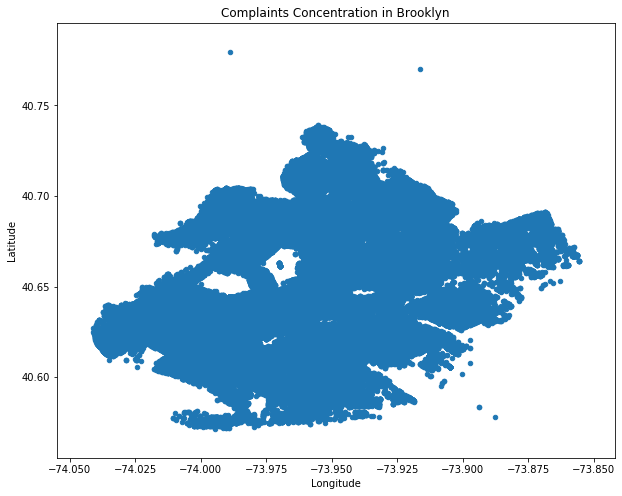

In [9]:
# Scatter plot for concentration in Brooklyn
df_cs_req_bkn = df_cs_req.loc[df_cs_req['City']=='BROOKLYN']
df_cs_req_bkn[['Longitude','Latitude']].plot(kind='scatter',x='Longitude',y='Latitude',title='Complaints Concentration in Brooklyn',figsize=(10,8))

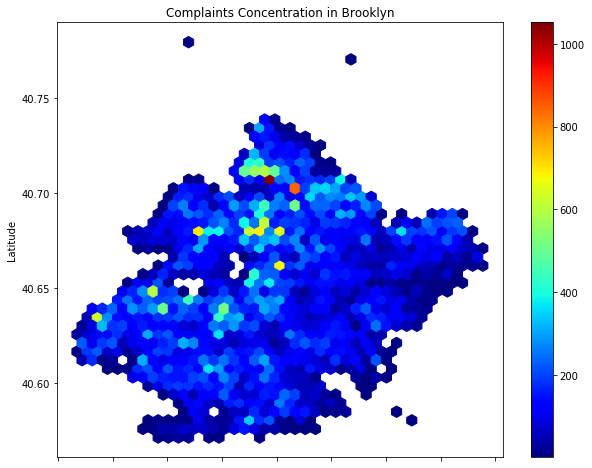

In [10]:
# Draw hexbin plot for complaint concentration across Brooklyn
df_cs_req_bkn[['Longitude','Latitude']].plot(kind='hexbin',x='Longitude',y='Latitude',gridsize=40,colormap='jet',mincnt=1,title='Complaints Concentration in Brooklyn',figsize=(10,8))

In [11]:
df_cs_req_fillna = df_cs_req.fillna(0)
df_cs_req_fillna
(df_cs_req_fillna['Closed Date']==0).sum()

2381

In [12]:
df_cs_req_fillna_final = df_cs_req_fillna[['Created Date','Closed Date','Agency','Complaint Type','Location Type','City','Status','Due Date','Resolution Description','Community Board','Borough','Latitude','Longitude','Location']]
df_cs_req_fillna_final

,Created Date,Closed Date,Agency,Complaint Type,Location Type,City,Status,Due Date,Resolution Description,Community Board,Borough,Latitude,Longitude,Location
0,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,Noise - Street/Sidewalk,Street/Sidewalk,NEW YORK,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,12 MANHATTAN,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,Blocked Driveway,Street/Sidewalk,ASTORIA,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01 QUEENS,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,Blocked Driveway,Street/Sidewalk,BRONX,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,07 BRONX,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,Illegal Parking,Street/Sidewalk,BRONX,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,10 BRONX,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,Illegal Parking,Street/Sidewalk,ELMHURST,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,04 QUEENS,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,Illegal Parking,Street/Sidewalk,WOODHAVEN,Closed,01/01/2015 08:04:44 AM,The Police Department responded to the complai...,09 QUEENS,QUEENS,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,Noise - Vehicle,Street/Sidewalk,BRONX,Closed,01/01/2015 08:04:28 AM,The Police Department responded to the complai...,07 BRONX,BRONX,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,Noise - Street/Sidewalk,Street/Sidewalk,NEW YORK,Closed,01/01/2015 08:01:30 AM,The Police Department responded to the complai...,09 MANHATTAN,MANHATTAN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,Blocked Driveway,Street/Sidewalk,BRONX,Closed,01/01/2015 08:01:29 AM,The Police Department responded and upon arriv...,12 BRONX,BRONX,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"


In [13]:
#(df_cs_req_fillna_final['Closed Date']==0).all()
#0 in df_cs_req_fillna_final.values
(df_cs_req_fillna_final['Closed Date']==0).sum()

2381

In [14]:
from dateutil import relativedelta
from datetime import datetime
# Create a new column 'Request Closing Time'
t1=datetime.strptime('12/31/2015 11:59:45 PM','%m/%d/%Y %H:%M:%S %p')
t2 = datetime.strptime('01/01/2016 12:55:15 AM','%m/%d/%Y %H:%M:%S %p')
diff = t2-t1
print(diff.days)
#print(t1.time())


#d1 = datetime(2015,12,31,11,59,45)
#d2= datetime(2016,1,1,24,55,15)
#diff = relativedelta.relativedelta(d2,d1)
#df_cs_req_fillna_final['Request Closing Time'] = (df_cs_req_fillna_final['Created Date'] - df_cs_req_fillna_final['Closed Date'])

1


In [15]:
s=pd.to_datetime('12/31/2015 01:59:45 AM', format='%m/%d/%Y %H:%M:%S %p')
s

Timestamp('2015-12-31 01:59:45')

In [16]:
t1=datetime.strptime(df_cs_req_fillna_final['Created Date'],'%m/%d/%Y %H:%M:%S %p')
t2 = datetime.strptime(df_cs_req_fillna_final['Closed Date'],'%m/%d/%Y %H:%M:%S %p')
diff = t2-t1
print(diff.days)

TypeError: strptime() argument 1 must be str, not Series

In [17]:
df_cs_req_fillna_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Created Date            364558 non-null  object 
 1   Closed Date             364558 non-null  object 
 2   Agency                  364558 non-null  object 
 3   Complaint Type          364558 non-null  object 
 4   Location Type           364558 non-null  object 
 5   City                    364558 non-null  object 
 6   Status                  364558 non-null  object 
 7   Due Date                364558 non-null  object 
 8   Resolution Description  364558 non-null  object 
 9   Community Board         364558 non-null  object 
 10  Borough                 364558 non-null  object 
 11  Latitude                364558 non-null  float64
 12  Longitude               364558 non-null  float64
 13  Location                364558 non-null  object 
dtypes: float64(2), objec

In [18]:
# Convert format of date columns
df_cs_req_fillna_final['Created Date'] = pd.to_datetime(df_cs_req_fillna_final['Created Date'],errors='coerce')
df_cs_req_fillna_final['Closed Date'] = pd.to_datetime(df_cs_req_fillna_final['Closed Date'],errors='coerce')

C:\Users\jency\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jency\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
df_cs_req_fillna_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Created Date            364558 non-null  datetime64[ns]
 1   Closed Date             364558 non-null  datetime64[ns]
 2   Agency                  364558 non-null  object        
 3   Complaint Type          364558 non-null  object        
 4   Location Type           364558 non-null  object        
 5   City                    364558 non-null  object        
 6   Status                  364558 non-null  object        
 7   Due Date                364558 non-null  object        
 8   Resolution Description  364558 non-null  object        
 9   Community Board         364558 non-null  object        
 10  Borough                 364558 non-null  object        
 11  Latitude                364558 non-null  float64       
 12  Longitude               364558

In [20]:
df_cs_req_fillna_final['Request Closing Time'] = (df_cs_req_fillna_final['Closed Date'] - df_cs_req_fillna_final['Created Date'])
df_cs_req_fillna_final.head()

C:\Users\jency\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Created Date,Closed Date,Agency,Complaint Type,Location Type,City,Status,Due Date,Resolution Description,Community Board,Borough,Latitude,Longitude,Location,Request Closing Time
0,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,Noise - Street/Sidewalk,Street/Sidewalk,NEW YORK,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,12 MANHATTAN,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:30
1,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,Blocked Driveway,Street/Sidewalk,ASTORIA,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01 QUEENS,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:27:13
2,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,Blocked Driveway,Street/Sidewalk,BRONX,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,07 BRONX,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:34
3,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,Illegal Parking,Street/Sidewalk,BRONX,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,10 BRONX,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:27
4,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,Illegal Parking,Street/Sidewalk,ELMHURST,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,04 QUEENS,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:44


In [21]:
df_cs_req_fillna_final['Request_Closing_Time_Hrs'] = (df_cs_req_fillna_final['Closed Date'] - df_cs_req_fillna_final['Created Date']).dt.total_seconds()/60/60
df_cs_req_fillna_final.head()

C:\Users\jency\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Created Date,Closed Date,Agency,Complaint Type,Location Type,City,Status,Due Date,Resolution Description,Community Board,Borough,Latitude,Longitude,Location,Request Closing Time,Request_Closing_Time_Hrs
0,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,Noise - Street/Sidewalk,Street/Sidewalk,NEW YORK,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,12 MANHATTAN,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:30,0.925000
1,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,Blocked Driveway,Street/Sidewalk,ASTORIA,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01 QUEENS,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:27:13,1.453611
2,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,Blocked Driveway,Street/Sidewalk,BRONX,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,07 BRONX,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:34,4.859444
3,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,Illegal Parking,Street/Sidewalk,BRONX,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,10 BRONX,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:27,7.757500
4,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,Illegal Parking,Street/Sidewalk,ELMHURST,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,04 QUEENS,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:44,3.462222


In [22]:
df_cs_req_fillna_final['Request_Closing_Time_Days'] = (df_cs_req_fillna_final['Closed Date'] - df_cs_req_fillna_final['Created Date']).dt.total_seconds()/60/60/24
df_cs_req_fillna_final

C:\Users\jency\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Created Date,Closed Date,Agency,Complaint Type,Location Type,City,Status,Due Date,Resolution Description,Community Board,Borough,Latitude,Longitude,Location,Request Closing Time,Request_Closing_Time_Hrs,Request_Closing_Time_Days
0,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,Noise - Street/Sidewalk,Street/Sidewalk,NEW YORK,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,12 MANHATTAN,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:30,0.925000,0.038542
1,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,Blocked Driveway,Street/Sidewalk,ASTORIA,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01 QUEENS,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:27:13,1.453611,0.060567
2,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,Blocked Driveway,Street/Sidewalk,BRONX,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,07 BRONX,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:34,4.859444,0.202477
3,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,Illegal Parking,Street/Sidewalk,BRONX,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,10 BRONX,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:27,7.757500,0.323229
4,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,Illegal Parking,Street/Sidewalk,ELMHURST,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,04 QUEENS,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:44,3.462222,0.144259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,2015-01-01 00:04:44,2015-01-01 10:22:31,NYPD,Illegal Parking,Street/Sidewalk,WOODHAVEN,Closed,01/01/2015 08:04:44 AM,The Police Department responded to the complai...,09 QUEENS,QUEENS,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)",10:17:47,10.296389,0.429016
364554,2015-01-01 00:04:28,2015-01-01 02:25:02,NYPD,Noise - Vehicle,Street/Sidewalk,BRONX,Closed,01/01/2015 08:04:28 AM,The Police Department responded to the complai...,07 BRONX,BRONX,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)",02:20:34,2.342778,0.097616
364555,2015-01-01 00:01:30,2015-01-01 00:20:33,NYPD,Noise - Street/Sidewalk,Street/Sidewalk,NEW YORK,Closed,01/01/2015 08:01:30 AM,The Police Department responded to the complai...,09 MANHATTAN,MANHATTAN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)",00:19:03,0.317500,0.013229
364556,2015-01-01 00:01:29,2015-01-01 02:42:22,NYPD,Blocked Driveway,Street/Sidewalk,BRONX,Closed,01/01/2015 08:01:29 AM,The Police Department responded and upon arriv...,12 BRONX,BRONX,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)",02:40:53,2.681389,0.111725


In [94]:
df_cs_req_fillna_final['Request_Closing_Time_Full_Days'] = (df_cs_req_fillna_final['Closed Date'] - df_cs_req_fillna_final['Created Date']).dt.days
df_cs_req_fillna_final

C:\Users\jency\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Created Date,Closed Date,Agency,Complaint Type,Location Type,City,Status,Due Date,Resolution Description,Community Board,Borough,Latitude,Longitude,Location,Request Closing Time,Request_Closing_Time_Hrs,Request_Closing_Time_Days,Request_Closing_Time_Full_Days
0,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,Noise - Street/Sidewalk,Street/Sidewalk,NEW YORK,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,12 MANHATTAN,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:30,0.925000,0.038542,0
1,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,Blocked Driveway,Street/Sidewalk,ASTORIA,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01 QUEENS,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:27:13,1.453611,0.060567,0
2,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,Blocked Driveway,Street/Sidewalk,BRONX,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,07 BRONX,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:34,4.859444,0.202477,0
3,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,Illegal Parking,Street/Sidewalk,BRONX,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,10 BRONX,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:27,7.757500,0.323229,0
4,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,Illegal Parking,Street/Sidewalk,ELMHURST,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,04 QUEENS,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:44,3.462222,0.144259,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,2015-01-01 00:04:44,2015-01-01 10:22:31,NYPD,Illegal Parking,Street/Sidewalk,WOODHAVEN,Closed,01/01/2015 08:04:44 AM,The Police Department responded to the complai...,09 QUEENS,QUEENS,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)",10:17:47,10.296389,0.429016,0
364554,2015-01-01 00:04:28,2015-01-01 02:25:02,NYPD,Noise - Vehicle,Street/Sidewalk,BRONX,Closed,01/01/2015 08:04:28 AM,The Police Department responded to the complai...,07 BRONX,BRONX,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)",02:20:34,2.342778,0.097616,0
364555,2015-01-01 00:01:30,2015-01-01 00:20:33,NYPD,Noise - Street/Sidewalk,Street/Sidewalk,NEW YORK,Closed,01/01/2015 08:01:30 AM,The Police Department responded to the complai...,09 MANHATTAN,MANHATTAN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)",00:19:03,0.317500,0.013229,0
364556,2015-01-01 00:01:29,2015-01-01 02:42:22,NYPD,Blocked Driveway,Street/Sidewalk,BRONX,Closed,01/01/2015 08:01:29 AM,The Police Department responded and upon arriv...,12 BRONX,BRONX,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)",02:40:53,2.681389,0.111725,0


### 4. Order the complaint types based on the average 'Request_Closing_Time' grouping them for different locations

In [24]:
df_cs_req_fillna_final.columns
df_cs_req_fillna_final['Location Type'].unique()
#df_cs_req_fillna_final_drop['Location Type'].unique()

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot', 'Bridge', 'Terminal', 0, 'Ferry',
       'Park'], dtype=object)

In [95]:
# Drop rows with Location Type = 0
df_cs_req_fillna_final_dp1 = df_cs_req_fillna_final.drop(df_cs_req_fillna_final[df_cs_req_fillna_final['Closed Date'] == 0].index)
print(df_cs_req_fillna_final_dp1)
(df_cs_req_fillna_final_dp1['Closed Date']==0).sum()


              Created Date         Closed Date Agency  \
0      2015-12-31 23:59:45 2016-01-01 00:55:15   NYPD   
1      2015-12-31 23:59:44 2016-01-01 01:26:57   NYPD   
2      2015-12-31 23:59:29 2016-01-01 04:51:03   NYPD   
3      2015-12-31 23:57:46 2016-01-01 07:43:13   NYPD   
4      2015-12-31 23:56:58 2016-01-01 03:24:42   NYPD   
...                    ...                 ...    ...   
364553 2015-01-01 00:04:44 2015-01-01 10:22:31   NYPD   
364554 2015-01-01 00:04:28 2015-01-01 02:25:02   NYPD   
364555 2015-01-01 00:01:30 2015-01-01 00:20:33   NYPD   
364556 2015-01-01 00:01:29 2015-01-01 02:42:22   NYPD   
364557 2015-01-01 00:00:50 2015-01-01 02:47:50   NYPD   

                 Complaint Type    Location Type              City  Status  \
0       Noise - Street/Sidewalk  Street/Sidewalk          NEW YORK  Closed   
1              Blocked Driveway  Street/Sidewalk           ASTORIA  Closed   
2              Blocked Driveway  Street/Sidewalk             BRONX  Closed   
3  

0

In [26]:
# Shape of data post dropping Closed_Date = 0
df_cs_req_fillna_final_dp1.shape

(364558, 18)

In [27]:
df_cs_req_fillna_final_dp1.isnull().sum()
df_cs_req_fillna_final_dp1['City'].isnull().sum()
(df_cs_req_fillna_final_dp1['City']==0).sum()

2997

In [28]:
df_cs_req_fillna_final_dp1['City'].replace(to_replace=0,value="Unknown City",inplace=True)
df_cs_req_fillna_final_dp1
(df_cs_req_fillna_final_dp1['City']=='Unknown City').sum()

2997

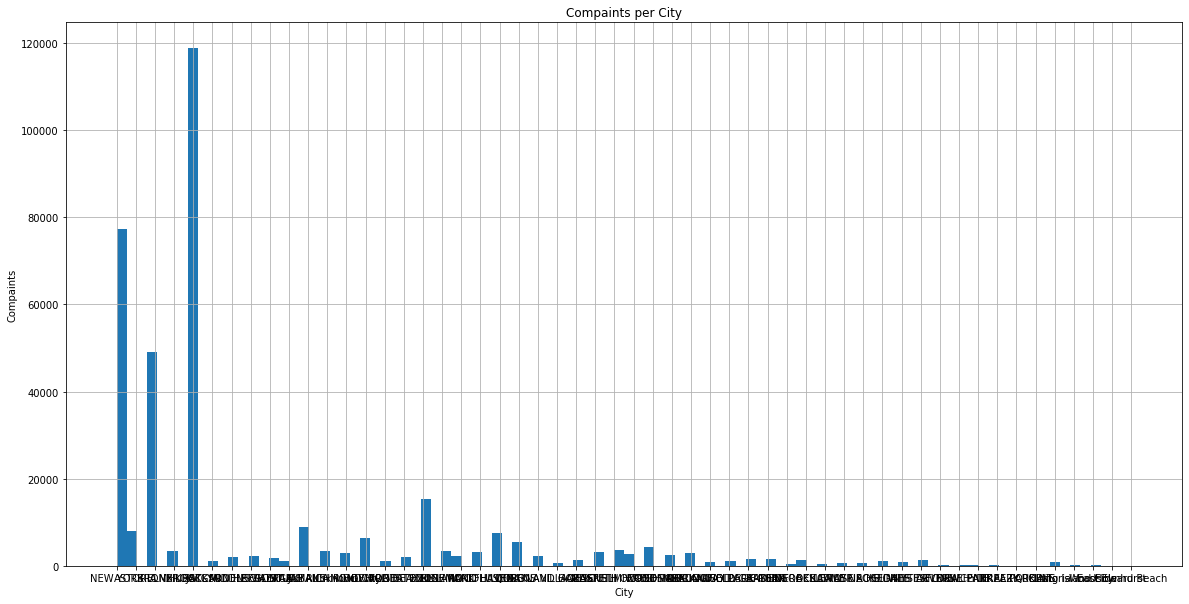

In [29]:
# Frequency plot for complaints in each city
plt.figure(figsize=(20,10))
df_cs_req_fillna_final_dp1['City'].hist(bins=100)
#df_cs_req_fillna_final_dropped.plot(x='City',y=['Request_Closing_Time_Hrs'],kind='bar',figsize=(10,8))
plt.title("Compaints per City")
plt.xlabel("City")
plt.ylabel("Compaints")
plt.show()

In [30]:
#df_cs_req_fillna_final_dropped.groupby(['City','Complaint Type']).size().plot.bar()
df_cs_req_fillna_final_dp1.groupby(['City','Complaint Type']).size().head(25)


City     Complaint Type           
ARVERNE  Animal Abuse                   46
         Blocked Driveway               50
         Derelict Vehicle               32
         Disorderly Youth                2
         Drinking                        1
         Graffiti                        1
         Homeless Encampment             4
         Illegal Parking                62
         Noise - Commercial              2
         Noise - House of Worship       14
         Noise - Park                    2
         Noise - Street/Sidewalk        29
         Noise - Vehicle                10
         Panhandling                     1
         Traffic                         1
         Urinating in Public             1
         Vending                         1
ASTORIA  Animal Abuse                  170
         Bike/Roller/Skate Chronic      16
         Blocked Driveway             3436
         Derelict Vehicle              426
         Disorderly Youth                5
         Drinking  

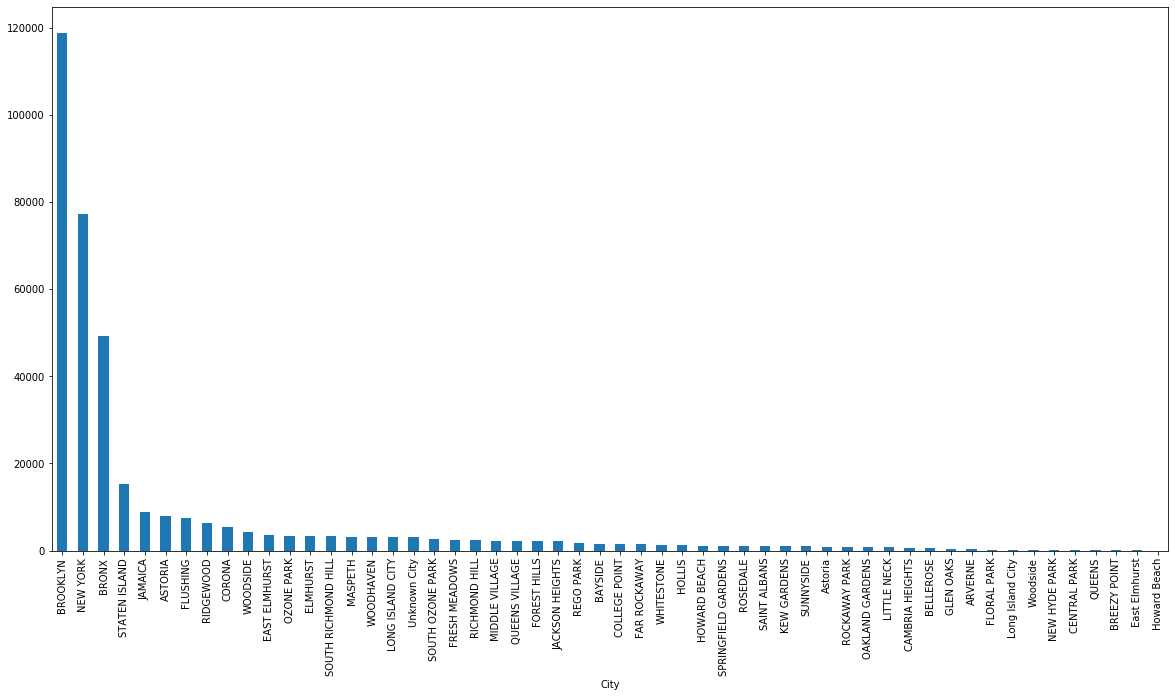

In [31]:
# Cities with most complaints
df_cs_req_fillna_final_dp1.groupby(['City']).size().sort_values(ascending=False).plot.bar(figsize=(20,10))

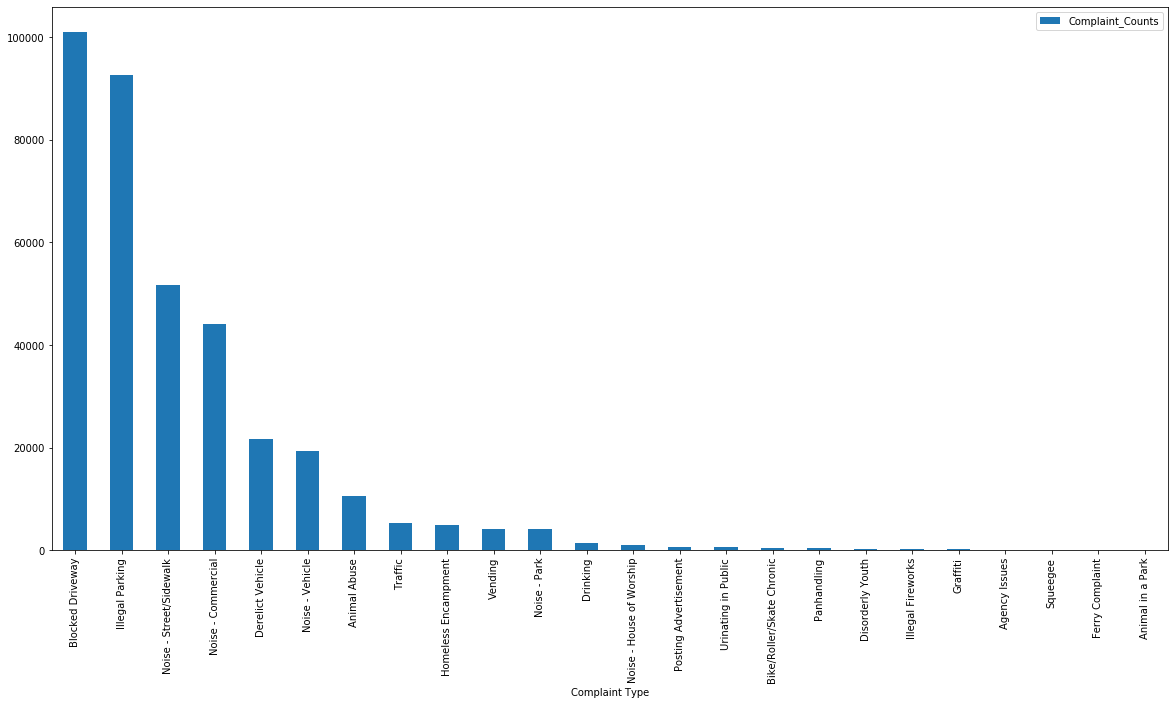

In [32]:
# Types of complaints and most reported complaints
df_cs_req_fillna_final_dp1.groupby('Complaint Type').size().sort_values(ascending=False).reset_index(name='Complaint_Counts').plot(kind='bar',x='Complaint Type',y='Complaint_Counts',figsize=(20,10))
plt.show()

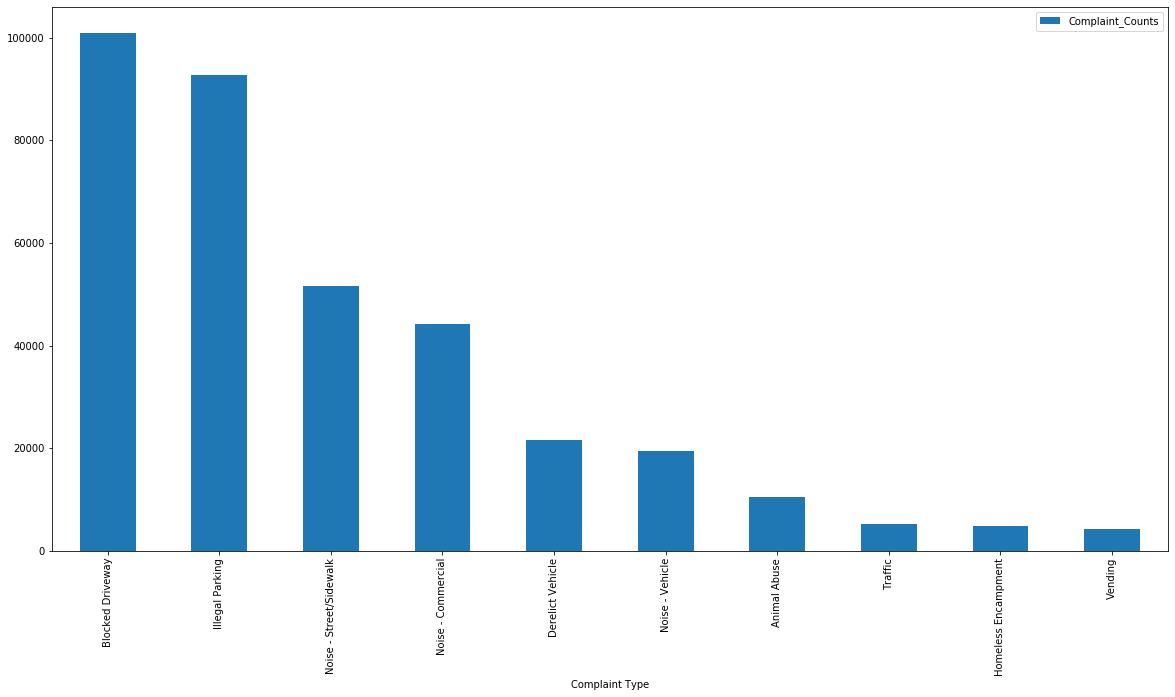

In [33]:
df_cs_req_fillna_final_dp1.groupby('Complaint Type').size().sort_values(ascending=False).reset_index(name='Complaint_Counts').head(10).plot(kind='bar',x='Complaint Type',y='Complaint_Counts',figsize=(20,10))
plt.show()

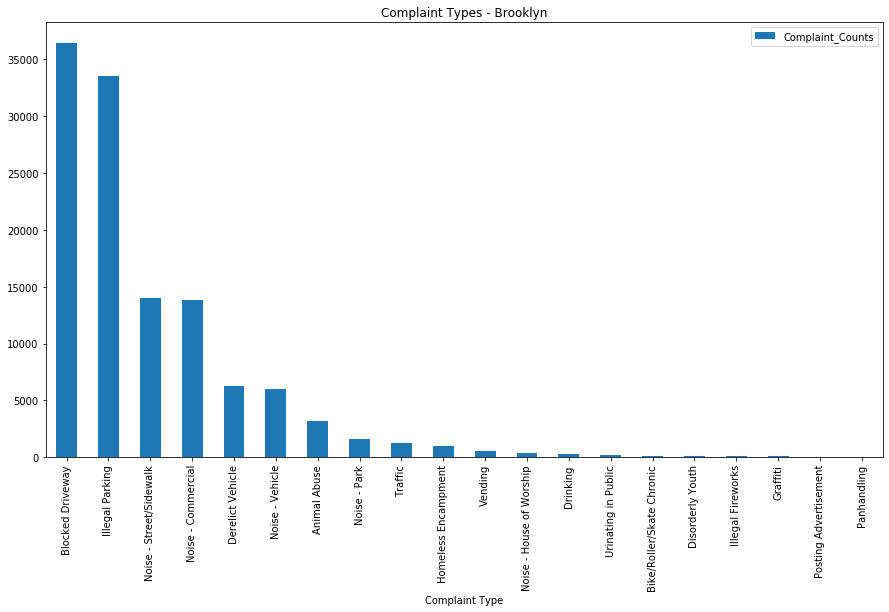

              Created Date    Complaint Type      City
9      2015-12-31 23:53:58  Blocked Driveway  BROOKLYN
36     2015-12-31 23:13:47  Blocked Driveway  BROOKLYN
102    2015-12-31 22:26:03  Blocked Driveway  BROOKLYN
110    2015-12-31 22:17:00  Blocked Driveway  BROOKLYN
117    2015-12-31 22:07:16  Blocked Driveway  BROOKLYN
...                    ...               ...       ...
364515 2015-01-01 00:59:09  Blocked Driveway  BROOKLYN
364539 2015-01-01 00:23:55  Blocked Driveway  BROOKLYN
364541 2015-01-01 00:19:22  Blocked Driveway  BROOKLYN
364545 2015-01-01 00:17:47  Blocked Driveway  BROOKLYN
364546 2015-01-01 00:15:45  Blocked Driveway  BROOKLYN

[36447 rows x 3 columns]


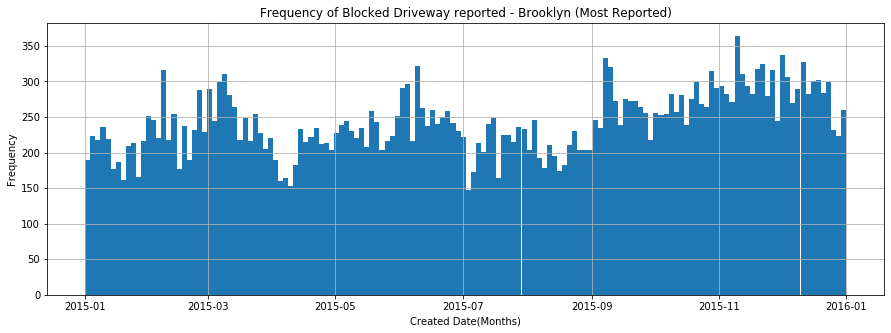

In [34]:
# Frequency of various type of complaints for Brooklyn
df_cs_req_fillna_final_dp_bkn = df_cs_req_fillna_final_dp1.loc[df_cs_req_fillna_final_dp1['City']=='BROOKLYN']
df_cs_req_fillna_final_dp_bkn.groupby('Complaint Type').size().sort_values(ascending=False).reset_index(name='Complaint_Counts').plot(kind='bar',x='Complaint Type',y='Complaint_Counts',title='Complaint Types - Brooklyn',figsize=(15,8))
plt.show()

#df_cs_req_fillna_final_dp_bkn.loc[['Complaint Type']=='Blocked Driveway'].plot(kind='bar',x='Created Date',)
dfb = df_cs_req_fillna_final_dp_bkn.loc[df_cs_req_fillna_final_dp_bkn['Complaint Type']=='Blocked Driveway']
dfb=dfb[['Created Date','Complaint Type','City']]
#dfb.plot(kind='line',x='Created Date',y='Complaint Type',figsize=(10,8))
print(dfb)
plt.figure(figsize=(15,5))
dfb['Created Date'].hist(bins=150)
plt.title("Frequency of Blocked Driveway reported - Brooklyn (Most Reported)")
plt.xlabel("Created Date(Months)")
plt.ylabel("Frequency")
plt.show()

              Created Date Complaint Type      City
2076   2015-12-29 16:31:37    Panhandling  BROOKLYN
8254   2015-12-22 12:56:41    Panhandling  BROOKLYN
9888   2015-12-20 19:52:10    Panhandling  BROOKLYN
10959  2015-12-19 19:54:23    Panhandling  BROOKLYN
30427  2015-12-01 06:59:14    Panhandling  BROOKLYN
30430  2015-12-01 06:57:24    Panhandling  BROOKLYN
30696  2015-11-30 20:43:11    Panhandling  BROOKLYN
43537  2015-11-17 19:46:16    Panhandling  BROOKLYN
49172  2015-11-12 10:41:06    Panhandling  BROOKLYN
55405  2015-11-06 14:51:44    Panhandling  BROOKLYN
57801  2015-11-04 09:13:14    Panhandling  BROOKLYN
64236  2015-10-29 11:14:14    Panhandling  BROOKLYN
68072  2015-10-25 10:27:29    Panhandling  BROOKLYN
87492  2015-10-07 17:15:55    Panhandling  BROOKLYN
102918 2015-09-23 12:19:56    Panhandling  BROOKLYN
105740 2015-09-20 23:20:09    Panhandling  BROOKLYN
119319 2015-09-09 19:10:57    Panhandling  BROOKLYN
126029 2015-09-04 10:05:22    Panhandling  BROOKLYN
137018 2015-

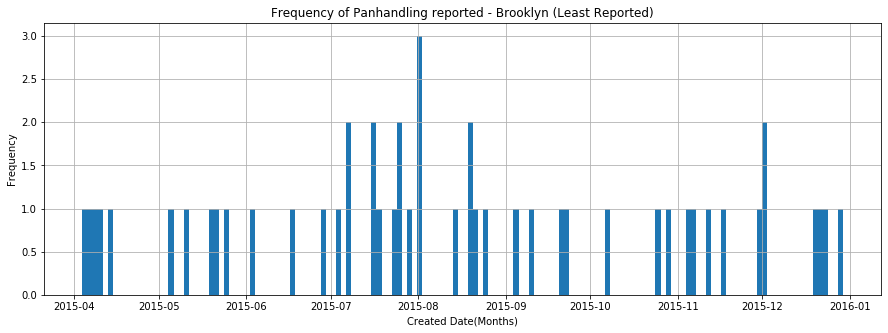

In [35]:
# Frequency of various type of complaints for Brooklyn
df_cs_req_fillna_final_dp_bkn = df_cs_req_fillna_final_dp1.loc[df_cs_req_fillna_final_dp1['City']=='BROOKLYN']
dfd = df_cs_req_fillna_final_dp_bkn.loc[df_cs_req_fillna_final_dp_bkn['Complaint Type']=='Panhandling']
dfd=dfd[['Created Date','Complaint Type','City']]
#dfb.plot(kind='line',x='Created Date',y='Complaint Type',figsize=(10,8))
print(dfd)
plt.figure(figsize=(15,5))
dfd['Created Date'].hist(bins=150)
plt.title("Frequency of Panhandling reported - Brooklyn (Least Reported)")
plt.xlabel("Created Date(Months)")
plt.ylabel("Frequency")
plt.show()

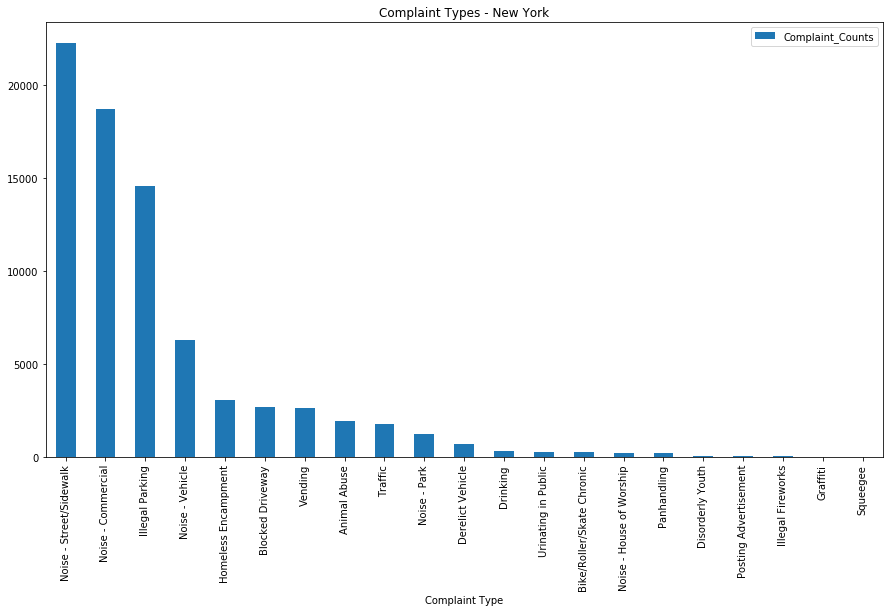

In [36]:
# Frequency of various type of complaints for New York
df_cs_req_fillna_final_dp_ny = df_cs_req_fillna_final_dp1.loc[df_cs_req_fillna_final_dp1['City']=='NEW YORK']
df_cs_req_fillna_final_dp_ny.groupby('Complaint Type').size().sort_values(ascending=False).reset_index(name='Complaint_Counts').plot(kind='bar',x='Complaint Type',y='Complaint_Counts',title='Complaint Types - New York',figsize=(15,8))
plt.show()

              Created Date           Complaint Type      City
0      2015-12-31 23:59:45  Noise - Street/Sidewalk  NEW YORK
19     2015-12-31 23:40:55  Noise - Street/Sidewalk  NEW YORK
54     2015-12-31 22:58:16  Noise - Street/Sidewalk  NEW YORK
111    2015-12-31 22:15:58  Noise - Street/Sidewalk  NEW YORK
121    2015-12-31 22:02:19  Noise - Street/Sidewalk  NEW YORK
...                    ...                      ...       ...
364542 2015-01-01 00:19:20  Noise - Street/Sidewalk  NEW YORK
364543 2015-01-01 00:18:49  Noise - Street/Sidewalk  NEW YORK
364547 2015-01-01 00:15:33  Noise - Street/Sidewalk  NEW YORK
364552 2015-01-01 00:05:05  Noise - Street/Sidewalk  NEW YORK
364555 2015-01-01 00:01:30  Noise - Street/Sidewalk  NEW YORK

[22252 rows x 3 columns]


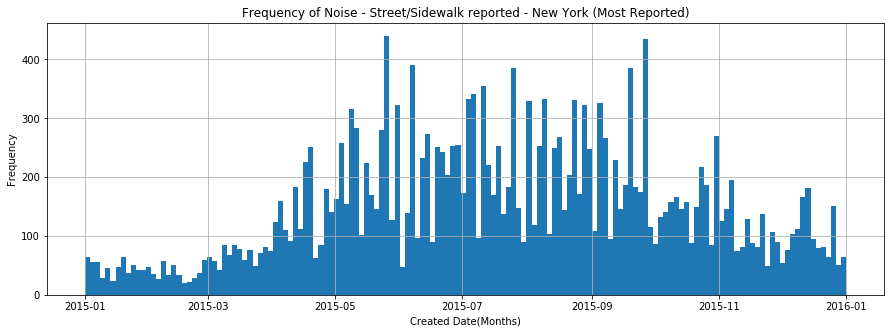

In [37]:
# Frequency of complaints reported most in New York
dfn = df_cs_req_fillna_final_dp_ny.loc[df_cs_req_fillna_final_dp_ny['Complaint Type']=='Noise - Street/Sidewalk']
dfn=dfn[['Created Date','Complaint Type','City']]
#dfb.plot(kind='line',x='Created Date',y='Complaint Type',figsize=(10,8))
print(dfn)
plt.figure(figsize=(15,5))
dfn['Created Date'].hist(bins=150)
plt.title("Frequency of Noise - Street/Sidewalk reported - New York (Most Reported)")
plt.xlabel("Created Date(Months)")
plt.ylabel("Frequency")
plt.show()

              Created Date Complaint Type      City
189095 2015-07-10 08:11:47       Squeegee  NEW YORK
215478 2015-06-17 16:59:07       Squeegee  NEW YORK
282636 2015-04-18 19:31:31       Squeegee  NEW YORK
297697 2015-04-01 18:12:09       Squeegee  NEW YORK


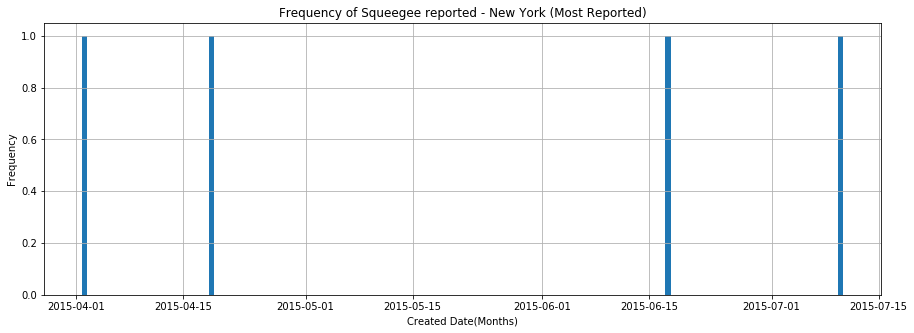

In [38]:
# Frequency of complaints reported least in New York
dfs = df_cs_req_fillna_final_dp_ny.loc[df_cs_req_fillna_final_dp_ny['Complaint Type']=='Squeegee']
dfs=dfs[['Created Date','Complaint Type','City']]
#dfb.plot(kind='line',x='Created Date',y='Complaint Type',figsize=(10,8))
print(dfs)
plt.figure(figsize=(15,5))
dfs['Created Date'].hist(bins=150)
plt.title("Frequency of Squeegee reported - New York (Most Reported)")
plt.xlabel("Created Date(Months)")
plt.ylabel("Frequency")
plt.show()

Complaint Type  Animal Abuse  Bike/Roller/Skate Chronic  Blocked Driveway  \
City                                                                        
BRONX                   1971                         22             17063   
BROOKLYN                3191                        124             36447   
JAMAICA                  317                          3              3621   
NEW YORK                1941                        254              2707   
STATEN ISLAND            786                         10              2845   

Complaint Type  Derelict Vehicle  Disorderly Youth  Drinking  Graffiti  \
City                                                                     
BRONX                       2403                66       206        15   
BROOKLYN                    6259                79       291        60   
JAMAICA                     1133                 9        40         3   
NEW YORK                     695                81       321        25   
STATEN ISLAND   

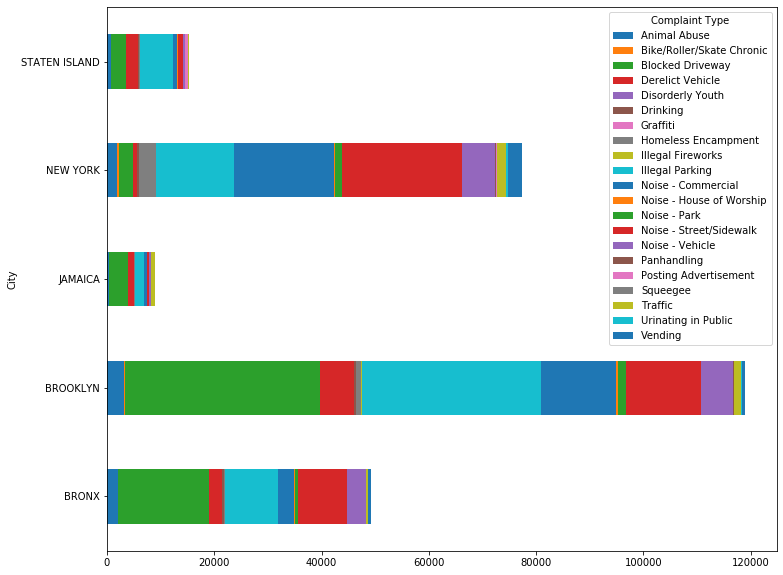

In [39]:
# Various types of complaints in top reported cities
top_cities = df_cs_req_fillna_final_dp1['City'].value_counts().sort_values(ascending=False).head(5).index.to_list()
#print(top_cities)
df_cs_req_fillna_final_dp_top5 = df_cs_req_fillna_final_dp1[df_cs_req_fillna_final_dp1.City.isin(top_cities)]
#print(df_cs_req_fillna_final_dp_top5)
df_cs_req_fillna_final_dp_1 = pd.crosstab(df_cs_req_fillna_final_dp_top5['City'],df_cs_req_fillna_final_dp_top5['Complaint Type'])
print(df_cs_req_fillna_final_dp_1)
df_cs_req_fillna_final_dp_1.plot(kind='barh',stacked=True,figsize=(12,10))

In [98]:

#print(df_cs_req_fillna_final_dp1.groupby(['City','Complaint Type'])['Request Closing Time'].apply(np.mean).sort_values())
print(df_cs_req_fillna_final_dp1.groupby(['City','Complaint Type'])['Request Closing Time'].apply(np.mean).sort_values())
df_cs_req_fillna_final_dp1.groupby(['City','Complaint Type'])['Request Closing Time'].apply(np.mean).sort_values().reset_index()

City                 Complaint Type           
0                    Posting Advertisement              -16638 days +06:48:53
                     Ferry Complaint             -16637 days +15:09:28.500000
                     Noise - House of Worship           -16611 days +00:14:15
                     Animal Abuse                -15276 days +23:03:12.333333
                     Vending                     -14241 days +11:09:33.428571
                                                             ...             
OAKLAND GARDENS      Homeless Encampment                      1 days 04:39:16
SOUTH RICHMOND HILL  Bike/Roller/Skate Chronic                1 days 06:54:37
BELLEROSE            Homeless Encampment                      1 days 15:08:50
QUEENS VILLAGE       Graffiti                                 2 days 05:19:55
QUEENS               Animal in a Park                        14 days 00:50:34
Name: Request Closing Time, Length: 795, dtype: timedelta64[ns]


,City,Complaint Type,Request Closing Time
0,0,Posting Advertisement,-16638 days +06:48:53
1,0,Ferry Complaint,-16637 days +15:09:28.500000
2,0,Noise - House of Worship,-16611 days +00:14:15
3,0,Animal Abuse,-15276 days +23:03:12.333333
4,0,Vending,-14241 days +11:09:33.428571
...,...,...,...
790,OAKLAND GARDENS,Homeless Encampment,1 days 04:39:16
791,SOUTH RICHMOND HILL,Bike/Roller/Skate Chronic,1 days 06:54:37
792,BELLEROSE,Homeless Encampment,1 days 15:08:50
793,QUEENS VILLAGE,Graffiti,2 days 05:19:55


In [41]:
df_cs_req_fillna_final_dp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364558 entries, 0 to 364557
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Created Date                    364558 non-null  datetime64[ns] 
 1   Closed Date                     364558 non-null  datetime64[ns] 
 2   Agency                          364558 non-null  object         
 3   Complaint Type                  364558 non-null  object         
 4   Location Type                   364558 non-null  object         
 5   City                            364558 non-null  object         
 6   Status                          364558 non-null  object         
 7   Due Date                        364558 non-null  object         
 8   Resolution Description          364558 non-null  object         
 9   Community Board                 364558 non-null  object         
 10  Borough                         364558 non-n

In [99]:
#(df_cs_req_fillna_final_dp1['Closed Date']==0).value_counts()
#df_cs_req_fillna_final_dp1['Closed Date'==0].value_counts()
if (df_cs_req_fillna_final_dp1['Closed Date']==0).all():
    print('all')
if (df_cs_req_fillna_final_dp1['Closed Date']==0).any():
    print('any')

    
df_Closed_Date_tot = df_cs_req_fillna_final_dp1.loc[(df_cs_req_fillna_final_dp1['City']==0)]


#df.loc[(df['Salary_in_1000']>=100) & (df['Age']< 60) & (df['FT_Team'].str.startswith('S')),['Name','FT_Team']]

#df_cs_req_fillna_final_dp1['Closed Date'] = pd.to_datetime(df_cs_req_fillna_final_dp1['Closed Date'],format='%yyyy-%mm-%dd %H:%M:%S')
df_Closed_Date = df_cs_req_fillna_final_dp1.loc[(df_cs_req_fillna_final_dp1['City']=='Unknown City') & (df_cs_req_fillna_final_dp1['Complaint Type']=='Ferry Complaint')]
df_Closed_Date
print(df_Closed_Date_tot.shape)
print(df_cs_req_fillna_final_dp1.shape)
print(364558-2997)


(2997, 18)
(364558, 18)
361561


In [109]:
df_cs_req_fillna_final_dp2 = df_cs_req_fillna_final_dp1.drop(df_cs_req_fillna_final_dp1[df_cs_req_fillna_final_dp1['City'] == 0].index)

print(df_cs_req_fillna_final_dp1.shape)
print(df_cs_req_fillna_final_dp2.shape)
df_cs_req_fillna_final_dp3=df_cs_req_fillna_final_dp2.drop(df_cs_req_fillna_final_dp2[df_cs_req_fillna_final_dp2['Closed Date']=='1970-01-01 00:00:00'].index)
df_cs_req_fillna_final_dp3

(364558, 18)
(361561, 18)


,Created Date,Closed Date,Agency,Complaint Type,Location Type,City,Status,Due Date,Resolution Description,Community Board,Borough,Latitude,Longitude,Location,Request Closing Time,Request_Closing_Time_Hrs,Request_Closing_Time_Days,Request_Closing_Time_Full_Days
0,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,Noise - Street/Sidewalk,Street/Sidewalk,NEW YORK,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,12 MANHATTAN,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:30,0.925000,0.038542,0
1,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,Blocked Driveway,Street/Sidewalk,ASTORIA,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01 QUEENS,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:27:13,1.453611,0.060567,0
2,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,Blocked Driveway,Street/Sidewalk,BRONX,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,07 BRONX,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:34,4.859444,0.202477,0
3,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,Illegal Parking,Street/Sidewalk,BRONX,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,10 BRONX,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:27,7.757500,0.323229,0
4,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,Illegal Parking,Street/Sidewalk,ELMHURST,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,04 QUEENS,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:44,3.462222,0.144259,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,2015-01-01 00:04:44,2015-01-01 10:22:31,NYPD,Illegal Parking,Street/Sidewalk,WOODHAVEN,Closed,01/01/2015 08:04:44 AM,The Police Department responded to the complai...,09 QUEENS,QUEENS,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)",10:17:47,10.296389,0.429016,0
364554,2015-01-01 00:04:28,2015-01-01 02:25:02,NYPD,Noise - Vehicle,Street/Sidewalk,BRONX,Closed,01/01/2015 08:04:28 AM,The Police Department responded to the complai...,07 BRONX,BRONX,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)",02:20:34,2.342778,0.097616,0
364555,2015-01-01 00:01:30,2015-01-01 00:20:33,NYPD,Noise - Street/Sidewalk,Street/Sidewalk,NEW YORK,Closed,01/01/2015 08:01:30 AM,The Police Department responded to the complai...,09 MANHATTAN,MANHATTAN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)",00:19:03,0.317500,0.013229,0
364556,2015-01-01 00:01:29,2015-01-01 02:42:22,NYPD,Blocked Driveway,Street/Sidewalk,BRONX,Closed,01/01/2015 08:01:29 AM,The Police Department responded and upon arriv...,12 BRONX,BRONX,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)",02:40:53,2.681389,0.111725,0


In [110]:
df_cs_req_fillna_final_dp3.groupby(['City','Complaint Type'])['Request Closing Time'].apply(np.mean).sort_values().reset_index()

,City,Complaint Type,Request Closing Time
0,ARVERNE,Drinking,0 days 00:14:19
1,RIDGEWOOD,Posting Advertisement,0 days 00:14:55
2,EAST ELMHURST,Bike/Roller/Skate Chronic,0 days 00:15:08
3,OZONE PARK,Illegal Fireworks,0 days 00:19:51
4,QUEENS,Urinating in Public,0 days 00:20:26
...,...,...,...
772,OAKLAND GARDENS,Homeless Encampment,1 days 04:39:16
773,SOUTH RICHMOND HILL,Bike/Roller/Skate Chronic,1 days 06:54:37
774,BELLEROSE,Homeless Encampment,1 days 15:08:50
775,QUEENS VILLAGE,Graffiti,2 days 05:19:55


In [112]:
df_cs_req_fillna_final_dp3['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Squeegee',
       'Animal in a Park'], dtype=object)

In [121]:
df_Avg_RespTime = df_cs_req_fillna_final_dp3.groupby(['City','Complaint Type'])['Request Closing Time'].apply(np.mean).sort_values().reset_index()
df_Avg_RespTime['Avg_Request_Closing_Time'] = df_Avg_RespTime['Request Closing Time']
df_Avg_RespTime.drop(columns='Request Closing Time',inplace=True)
df_Avg_RespTime

,City,Complaint Type,Avg_Request_Closing_Time
0,ARVERNE,Drinking,0 days 00:14:19
1,RIDGEWOOD,Posting Advertisement,0 days 00:14:55
2,EAST ELMHURST,Bike/Roller/Skate Chronic,0 days 00:15:08
3,OZONE PARK,Illegal Fireworks,0 days 00:19:51
4,QUEENS,Urinating in Public,0 days 00:20:26
...,...,...,...
772,OAKLAND GARDENS,Homeless Encampment,1 days 04:39:16
773,SOUTH RICHMOND HILL,Bike/Roller/Skate Chronic,1 days 06:54:37
774,BELLEROSE,Homeless Encampment,1 days 15:08:50
775,QUEENS VILLAGE,Graffiti,2 days 05:19:55


In [ ]:
df_Avg_RespTime.

In [43]:
# Z-score
# confusion matrix
# accuracy